(chap:matplotlib)=
# `Matplotlib`：図示

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

## 説明

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`Matplotlib`（「マットプロットリブ」と読む）はプロットのための代表的なパッケージであり、ここではその使い方を解説する。プロットには`Matplotlib`のモジュールである`pyplot`を使うことになる。慣例に沿って`plt`としてインポートする。<br>

`pyplot`モジュールを使ってプロットする場合、主に３つのコードの書き方がる。

**書き方１**：（オブジェクト指向）
```
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(...)
```
**書き方２**：（オブジェクト指向）
```
fig, ax = plt.subplots()
ax.plot(...)
```
**書き方３**： `Matlab`という有料ソフトのコードに沿った書き方
```
plt.plot(...)
```

本サイトでは書き方２に沿って`Matplotlib`の使い方を説明する。一方で，その裏にある考え方を理解するには、書き方１から始めた方が良いと思うので，書き方１の簡単な説明をすることにする。{numref}`fig:4-figure_axes`は，`Matplotlib`が描画する図の階層的な構造を示している。ここで重要なのは「キャンバス」と「軸」の違いである。


`Matplotlib`によるプロットは次の図のような構成となっている。

```{figure} /images/figure_axes_mpl.png
---
scale: 40%
name: fig:4-figure_axes
---
キャンバスと軸の関係
```

* キャンバスとは表示される**領域**であり，実際には表示されない透明のキャンバ」である。
    * 書き方１と書き方２では変数`fig`がキャンバスを表している。
    * `figure`や`fig`などの変数名や引数名があれば、キャンバスを指していると理解すれば良いだろう。
* 軸とは１つの図を表示する**区域**である。
    * 書き方１と書き方２では変数`ax`が軸を表している。
    * `ax`や`axes`などの変数名や引数名があれば、軸を表していると理解すれば良いだろう。
    * キャンバス上に複数のグラフを表示する場合は複数の区域を設定する必要がある。

これを踏まえて，書き方１は次のような手順で描画していと解釈できる。
1. キャンバスを用意する。
    * それを行なっているのが１行目である。右辺の`plt.figure()`でキャンバスを作成し、それを変数`fig`に割り当てている。
1. キャンバスに軸を追加する。
    * これをおこなっているのが２行目である。右辺では、キャンバス`fig`のメソッド`add_subplot()`を使いキャンバスに軸を追加し、それを左辺の変数`ax`に割り当てている。実際に、書き方１の２行のコードを実行すると透明のキャンバス上に軸が表示される。（試してみよう。）
    * 作成された軸`ax`にメソッド`plot()`などを使い直線・曲線・点など付け加えたり、タイトルなどの「飾り付け」をおこない作図することになる。
    * １つのキャンバスに複数の軸を作成し，複数の図を表示することが可能となる。

この説明でわかることは、`Matplotlib`で表示される図は透明のキャンバス上に描かれ装飾された軸ということである。以下の説明では、「図」はキャンバス全体に表示されたものを指す場合もあれば，ある一つの軸に表示されたものを指す場合もああるので，文脈で判断してほしい。

さて書き方２に話を戻すと、既に察している読者もいるかも知れないが、１行目は書き方１の最初の２行を１行に省略したものである。右辺の`plt.subplots()`は透明のキャンバスと軸の２つをタプルとして返す。最初の要素がキャンバスでありそれを左辺の`fig`に、２つ目の要素が軸であり`ax`に割り当てている。実際、１行目だけを実行すると軸が表示される。後は書き方１同様、`ax`のメソッド`plot()`などを使い軸を飾り付けして作図することになる。

ちなみに、書き方３は書き方２の３行を１行に省略した形と解釈して良いだろう。本来は`Matlab`（有料）ユーザーの`Python`への移行を促す為に用意された書き方である。

次に`plot()`のデータに関する引数について説明するが，主に２つの設定方法がある。

**データの引数の書き方１**：
```
plot(＜横軸のデータ＞, ＜縦軸のデータ＞)
```
**データの引数の書き方２**：変数のラベル名が使える場合（`Pandas`の`DataFrame`）
```
plot(＜横軸の変数名＞, ＜縦軸の変数名＞, data=＜データ名＞)
```

この２つの書き方の簡略形として，横軸の変数を省略することもできる。
```
plot(＜縦軸のデータ＞)

plot(＜縦軸の変数名＞, data=＜データ名＞)
```
この場合，横軸には`縦軸のデータ`のインデックス番号が使われることになる。手っ取り早く図示したい場合は良いかも知れない。

以下ではそれぞれの引数の書き方について解説する。

## データの引数の書き方１

### `array`を使って

プロットするデータを生成しよう。変数`x`に横軸に使うデータを次のように割り当てる。

In [2]:
x = np.linspace(-2, 2, 3)
x

array([-2.,  0.,  2.])

３つの要素からなる`array`である。縦軸のデータとして`y0`を用意する。

In [3]:
y0 = x**2
y0

array([4., 0., 4.])

同じように`y0`も３つの要素からなる`array`である。プロットしてみよう。

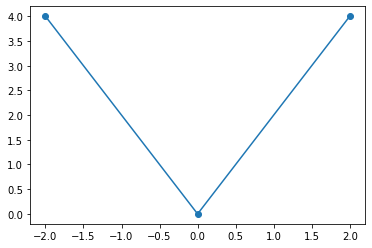

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y0, marker='o')

２行目に`marker='o'`が追加されているが，「●」を表示するために使っている。このような引数の使い方は後で詳しく説明するので，ここでは気にしないで読み進めて欲しい。

「●」のマーカーがある点が`x`と`y0`の`array`要素の組み合わせとして表示されている。`plot()`はデフォルトでそれらの点を直線で結んでいる。この場合，データの組み合わせが３点しかないため$y=x^2$の形を明確に表示できていない。言い換えると，データの組み合わせの数を増やすことにより$y=x^2$をより正確に表示されることになる。もう一度，`x`と`y0`のデータを生成しなおす。

In [5]:
x = np.linspace(-2, 2, 100)
y0 = x**2

`x`と`y0`にはそれぞれ100の要素があり，これらを使うことにより100のデータの組み合わせが成立することになる。プロットしてみよう。

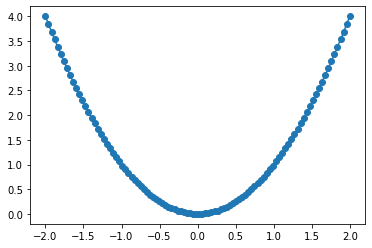

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y0, marker='o')

より$y=x^2$の図に近づいたことがわかる。

（注意点）
* 上の２つの図の上に文字が表示されているが，表示したくない場合は最後に`;`を加えるか次の行に`pass`と書くと表示されなくなる。
* `x`を省いて`ax.plot(y0)`としても同じような図が表示されるが，横軸の値がデータの数に対応することになり，意図した図と異なることになる。

次に縦軸のデータとして，２つを用意する。

In [7]:
y1 = x+1
y2 = np.exp(x)

`y0`，`y1`，`y2`を同じ軸にプロットしてみよう。コードは簡単で`ax.plot()`をリピートするだけである。

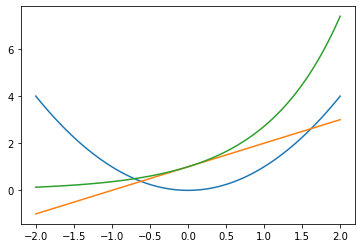

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y0)           
ax.plot(x, y1)
ax.plot(x, y2)
pass

それぞれの`ax.plot()`を「軸`ax`にデータの組み合わせをプロットする」と読めば理解しやすいと思う。また同じようなコードが続いているので，次のように`for`ループを使うことより短いコードで同じ図を表示することができる。

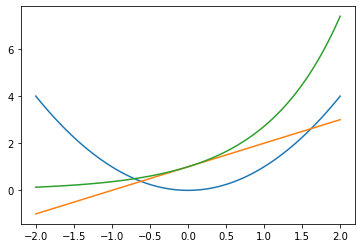

In [9]:
fig, ax = plt.subplots()

for y in [y0, y1, y2]:
    ax.plot(x, y)           

pass

### `DataFrame`を使って

まず`DataFrame`を作成しよう。

In [10]:
dic = {'X':x, 'Y0':y0, 'Y1':y1, 'Y2':y2}  # 辞書の作成

df0 = pd.DataFrame(dic)      # DataFrameの作成

df0.head()

,X,Y0,Y1,Y2
0,-2.000000,4.000000,-1.000000,0.135335
1,-1.959596,3.840016,-0.959596,0.140915
2,-1.919192,3.683298,-0.919192,0.146725
3,-1.878788,3.529844,-0.878788,0.152775
4,-1.838384,3.379655,-0.838384,0.159074


横軸に`X`，縦軸に`Y0`をプロットしてみる。

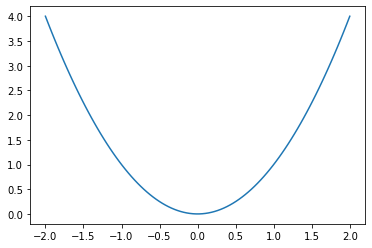

In [11]:
fig, ax = plt.subplots()
ax.plot(df0['X'],df0['Y0'])
pass

横軸に`X`，縦軸に`Y0`，`Y1`，`Y2`をプロットしてみる。

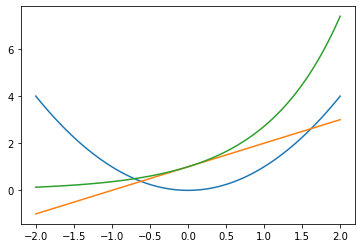

In [12]:
fig, ax = plt.subplots()
ax.plot(df0['X'],df0['Y0'])
ax.plot(df0['X'],df0['Y1'])
ax.plot(df0['X'],df0['Y2'])
pass

引数の書き方１の簡略形として，横軸の変数を省略できることを紹介した。その場合はどうなるかを考えてみよう。

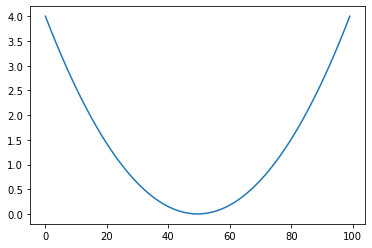

In [13]:
fig, ax = plt.subplots()
ax.plot(df0['Y0'])
pass

上の図との違いは横軸の値である。この場合，横軸に`df0`の行インデックスが自動的に使われている。

## データの引数の書き方２

次に引数`data`を使う書き方を考えてみる。

### 同じ`DataFrame`を使う

横軸に`X`，縦軸に`Y0`を指定してプロットしてみる。

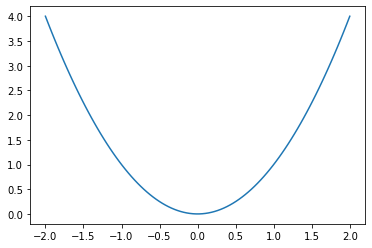

In [14]:
fig, ax = plt.subplots()
ax.plot('X', 'Y0', data=df0)
pass

変数`Y1`と`Y2`も同じ軸`ax`にプロットしてみよう。

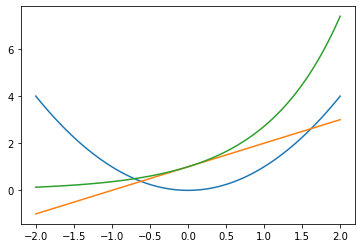

In [15]:
fig, ax = plt.subplots()
ax.plot('X', 'Y0', data=df0)
ax.plot('X', 'Y1', data=df0)
ax.plot('X', 'Y2', data=df0)
pass

````{note}
この場合，同じようなコードが続いているのでforループを使うと良いだろう。
```
fig, ax = plt.subplots()
for v in ['Y0','Y1','Y2']:
    ax.plot('X', v, data=df0)
```
````

横軸の`X`を指定せずにプロットしてみよう。

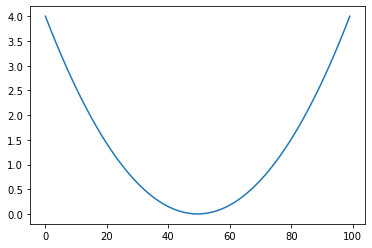

In [16]:
fig, ax = plt.subplots()
ax.plot('Y0', data=df0)
pass

行インデックスが横軸の値として使われている。

### 異なる`DataFrame`の変数を図示する

別の`DataFrame`を作成する。

In [17]:
dic = {'X':x, 'Y3':-x-1, 'Y4':-x**2}
df1 = pd.DataFrame(dic)
df1.head()

,X,Y3,Y4
0,-2.000000,1.000000,-4.000000
1,-1.959596,0.959596,-3.840016
2,-1.919192,0.919192,-3.683298
3,-1.878788,0.878788,-3.529844
4,-1.838384,0.838384,-3.379655


`X`を横軸として`df0`の`Y0`，`Y3`を横軸として`df1`の`Y3`を同じ図に表示してみよう。

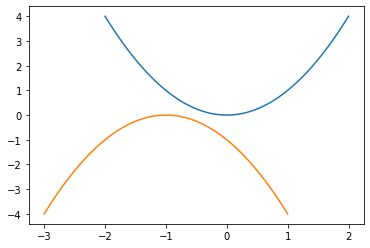

In [18]:
fig, ax = plt.subplots()
ax.plot('X', 'Y0', data=df0)
ax.plot('Y3', 'Y4', data=df1)
pass

## その他の引数とメソッド

(sec:4-other_methods)=
## その他の引数とメソッド

上で説明したコードでは単純なプロットしかできない。一方で様々な引数やメソッドが用意されており，それらを駆使することにより様々な「飾り付け」をすることが可能となる。ここでは主なものを紹介するが，他にも数多く用意されているので`Matplotlib`の[サイト](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)を参考にしてほしい。また，これらの引数・メソッドは，上述の「データの引数の書き方１」と「データの引数の書き方２」の両方に有効であることも覚えておこう。

引数・メソッドがもたらす違いを際立たせるために新たな`DataFrame`を使おう。

In [19]:
dic = {'X':[10, 20, 30],
       'Y':[5.0, 30.0, 15.0],
       'Z':[7.0, 2.0, 10.0]}
df2 = pd.DataFrame(dic)
df2.head()

,X,Y,Z
0,10,5.0,7.0
1,20,30.0,2.0
2,30,15.0,10.0


以下のプロットでは，横軸の変数を省略する簡略形を使うので，行インデックが横軸に使われるので注意しよう。

### `subplots()`の引数

`subplots()`はキャンバスと軸を設定する`plt`のメソッドとなるが、主に３つの引数を紹介する。
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `nrows`（デフォルトは`1`）：軸の数を指定するために使う引数（「図を並べる」のセクションで説明する）
* `ncols`（デフォルトは`1`）：軸の数を指定するために使う引数（「図を並べる」のセクションで説明する）
* `sharex`（デフォルトは`False`）：複数の軸がある場合に使う引数（「図を並べる」のセクションで説明する）
* `sharey`（デフォルトは`False`）：複数の軸がある場合に使う引数（「図を並べる」のセクションで説明する）
* `constrained_layout`（デフォルトは`False`）：複数の軸がある場合に使う引数であり，図の間隔を自動調整する（「図を並べる」のセクションで説明する）

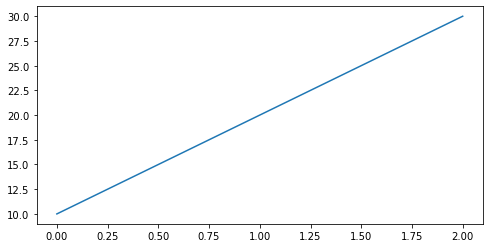

In [20]:
fix, ax = plt.subplots(figsize=(8,4))
ax.plot('X', data=df2)
pass

### `plot()`の基本的な引数

`plot()`は軸`ax`にデータを描くメソッドだが、引数を使うことによりデータの表示方法を指定できる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `linestyle`：線のスタイル（リストにして列の順番で指定する;`-`，`--`，`-.`，`:`などがある）
* `linewidth` or `lw`：線の幅
* `color` or `c`：色（[参照サイト](https://matplotlib.org/stable/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/stable/api/markers_api.html)）
* `markersize`：マーカーの大きさ
* `label`：以下で説明する`ax.legend()`がある場合に有効となる

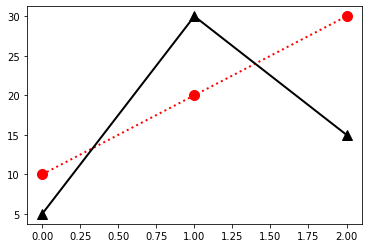

In [21]:
fix, ax = plt.subplots()
ax.plot('X'
           , data=df2
           , linestyle=':'
           , linewidth=2
           , color='red'
           , marker='o'
           , markersize=10
           , label='X series')
ax.plot('Y'
           , data=df2
           , linestyle='-'
           , linewidth=2
           , color='k'
           , marker='^'
           , markersize=10
           , label='X series')
pass

引数をいちいち書くのが面倒な場合、次の３つを簡略して一緒に指定できる。
* `linestyle`
* `color`
* `marker`

例えば、
* `linestyle=':'`
* `color='red'`
* `marker='o'`

の場合、`:ro`と書くことができる。

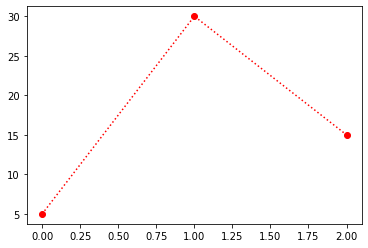

In [22]:
fix, ax = plt.subplots()
ax.plot('Y', ':ro', data=df2)
pass

（注意点）
* `:ro`は文字列
* `:`，`r`，`o`の順番を変えても良い。
* `:`や`:o`のように１つもしくは２つだけを指定しても良い。
* `:ro`は`=`を使う引数の前に置く。

詳細は[参考サイト（英語）](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)を参照。

### `ax`の基本的なメソッド

`ax`は透明なキャンバス上にある軸を指しているが、そのメソッドを使うことにより、軸周辺を「飾り付け」することができる。
* `.set_title()`：タイトルを設定する。
    * 文字列で指定し、大きさは引数`size`で指定する。
* `.set_xlabel()`：横軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `.set_ylabel()`：縦軸ラベル
    * 文字列で指定し、大きさは引数`size`で指定する。
* `.legend()`：凡例を表示する。
    * `plot()`の引数`label`がなければ、データ・フレームの列ラベルが使われる。
    * `plot()`の引数`label`があれば、それが使われる。
* `.grid()`：グリッド線が表示される。

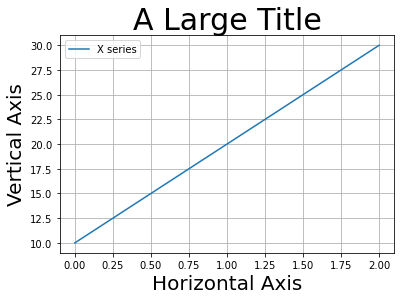

In [23]:
fig, ax = plt.subplots()
ax.plot('X', data=df2, label='X series')
ax.set_title('A Large Title', size= 30)     # タイトルの設定
ax.set_xlabel('Horizontal Axis', size=20)   # 横軸ラベルの設定
ax.set_ylabel('Vertical Axis', size=20)     # 縦軸ラベルの設定
ax.legend()
ax.grid()
pass

### 図を並べる

複数の図を並べたいとしよう。考え方としては、透明のキャンバスに複数の軸を設定し、それぞれの軸を使って作図していけば良いのである。キャンバスは四角なので偶数個の軸が設定できる。例として、次のように軸を配置したいとしよう。
```
+---+---+---+
| 1 | 2 | 3 |
+---+---+---+
| 4 | 5 | 6 |
+---+---+---+
```
２行・３列の配置になっており、左上から軸の番号が振られている。このような場合、`subplots()`の２つの引数が必須であり、別の２つの引数が有用である。
```
subplots(行の数, 列の数, sharex=False, sharey=False, constrained_layout=False)
```
* 行の数（デフォルトは`1`）：上の例では`2`
* 列の数（デフォルトは`1`）：上の例では`3`
* `sharex`（デフォルトは`False`）：`True`にすると、全ての図で横軸が同じになり、不要な横軸の数字などを非表示になる。
* `sharey`（デフォルトは`False`）：`Ture`にすると、全ての図で縦軸が同じになり、不要な縦軸の数字などを非表示にする
* `constrained_layout`（デフォルトは`False`）：`Ture`にすると、全ての図の間隔を調整して見やすくなる。

上の例を使うと次のようになる。

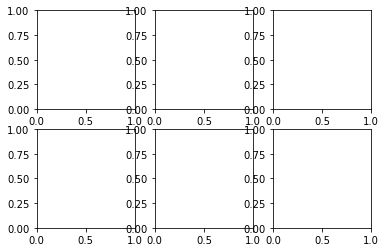

In [24]:
fig, ax = plt.subplots(2,3)

６つの軸が表示されているが、それらは`ax`に割り当てられている。`ax`を表示してみよう。

In [25]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

`<AxesSubplot:>`が軸を示しており、それぞれの軸に対応している。

In [26]:
ax.shape

(2, 3)

軸は`(2,3)`の`array`に格納されているのが確認できる。従って、それぞれの軸は`array`の要素を抽出することによりアクセスできる。
* `ax[0,0]`：軸１を抽出
* `ax[0,1]`：軸２を抽出
* `ax[0,2]`：軸３を抽出
* `ax[1,0]`：軸４を抽出
* `ax[1,1]`：軸５を抽出
* `ax[1,2]`：軸６を抽出

これを使い次のように６つのを図示できる。

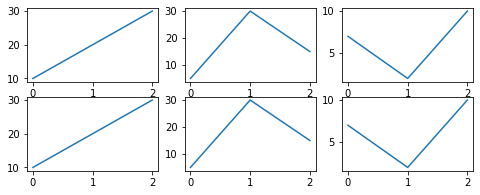

In [27]:
fig, ax = plt.subplots(2,3,figsize=(8,3))
ax[0,0].plot('X', data=df2)
ax[0,1].plot('Y', data=df2)
ax[0,2].plot('Z', data=df2)
ax[1,0].plot('X', data=df2)
ax[1,1].plot('Y', data=df2)
ax[1,2].plot('Z', data=df2)
pass

横軸と縦軸を共有するには次のようにする。

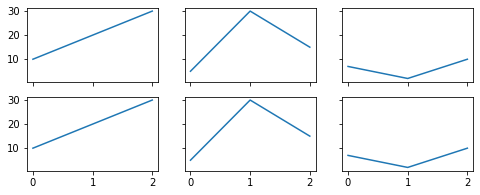

In [28]:
fig, ax = plt.subplots(2,3,figsize=(8,3),sharex=True,sharey=True)
ax[0,0].plot('X', data=df2)
ax[0,1].plot('Y', data=df2)
ax[0,2].plot('Z', data=df2)
ax[1,0].plot('X', data=df2)
ax[1,1].plot('Y', data=df2)
ax[1,2].plot('Z', data=df2)
pass

`ax`のメソッド（例えば、軸のタイトル）はそれぞれ設定することができる。

次に、キャンバス全体のタイトルを設定したいとしよう。キャンバスは`fig`に割り当てられているので、そのメソッド`suptitle`を使い表示することができる。

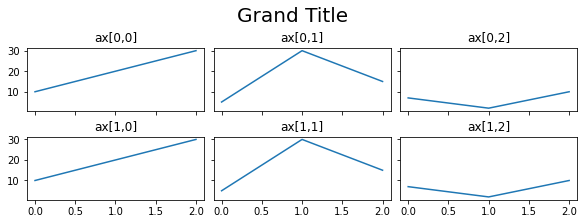

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(8,3),
                       sharex=True, sharey=True,
                       constrained_layout=True)
ax[0,0].plot('X', data=df2)
ax[0,0].set_title('ax[0,0]')

ax[0,1].plot('Y', data=df2)
ax[0,1].set_title('ax[0,1]')

ax[0,2].plot('Z', data=df2)
ax[0,2].set_title('ax[0,2]')

ax[1,0].plot('X', data=df2)
ax[1,0].set_title('ax[1,0]')

ax[1,1].plot('Y', data=df2)
ax[1,1].set_title('ax[1,1]')

ax[1,2].plot('Z', data=df2)
ax[1,2].set_title('ax[1,2]')

fig.suptitle("Grand Title", fontsize=20)
pass

### ２軸グラフ

複数のデータを表示する際、右の縦軸を使いデータを表示したい場合がある。例を使って説明することにする。

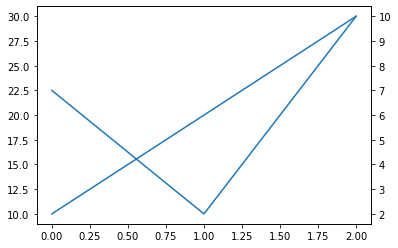

In [30]:
fig, ax1 = plt.subplots()  # (1)

ax2 = ax1.twinx()          # (2)

ax1.plot('X', data=df2)    # (3)
ax2.plot('Z', data=df2)    # (4)
pass

コードの説明

> 1. キャンバスと軸を作成し、軸を`ax1`に割り当てる。
> 2. `ax1`のメソッド`twinx()`を使い、右の縦軸を準備し`ax2`に割り当てる。
> 3. `ax1`に`X`をプロットする。
> 4. `ax2`に`Z`をプロットする。

また上で説明した方法で様々な「飾り付け」をすることができる。ただ、凡例については少し追加的なコードが必要となるので、それについても簡単に以下で説明する。

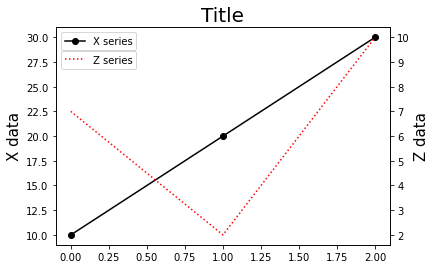

In [31]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot('X', 'k-o', data=df2, label='X series')
ax2.plot('Z', 'r:', data=df2, label='Z series')

ax1.set_title('Title', size=20)    # (1)
ax1.set_ylabel('X data', size=15)  # (2)
ax2.set_ylabel('Z data', size=15)  # (3)

ax1.legend()                       # (4)
ax2.legend(loc=(0.015,0.81))        # (5)
pass

コードの説明

> 1. 軸`ax1`にタイトルを設定しているが、`ax2`でも同じ図となる。
> 2. 軸`ax1`の縦軸（左）のラベルを設定する。
> 3. 軸`ax2`の縦軸（右）のラベルを設定する。
> 4. 軸`ax1`に描いた`X`の凡例を設定する。
>    * `legend()`には引数がないので`Matplotlib`が自動で凡例の位置を決める。この場合は図の左上に表示されている。
> 5. 軸`ax2`に描いた`Z`の凡例を設定する。
>    * `legend(loc=(0.015,0.8))`には引数`loc`があり、凡例の位置を指定している。`(0.015,0.8)`の数字は図の原点を`(0,0)`とて左の数字はx軸、右の数字はy軸の位置を指定している。もし引数を設定しないと、`X`の凡例を上書きすることになる。`(0.015,0.8)`のような指定方法だけではなく、他の方法もあるので[参照サイト](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)を参考にして欲しい。

## 日本語

２つ方法を紹介するが、`japanize_matplotlib`を使う方法がより簡単であろう。

### `japanize_matplotlib`

使い方は到って簡単で、`Pandas`と同様にインポートするだけである。

In [32]:
import japanize_matplotlib

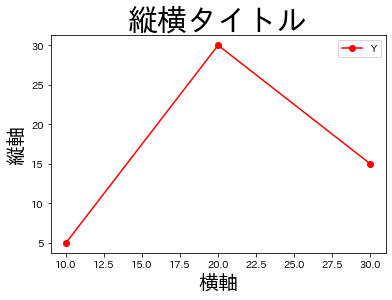

In [33]:
fix, ax = plt.subplots()
ax.plot('X', 'Y', 'r-o', data=df2)
ax.set_title('縦横タイトル', size= 30)
ax.set_xlabel('横軸', size=20)
ax.set_ylabel('縦軸', size=20)
ax.legend()
pass

### フォントを指定する

2つの方法：
1. フォントはインストールせず、PC内にあるフォントを指定する。
1. フォントをインストールする方法

方法１の場合、以下で説明に使う変数`jfont`にフォントを指定する。
    * Macの場合、例えば`AppleGothic`
    * Windowsの場合、例えば`Yu Gothic`
    * この方法では一部の日本語が文字化けする場合がある。

方法２の場合：
* [このサイト](https://ipafont.ipa.go.jp/node193#jp)から次の内の１つをダウンロードする。
    * 2書体パック(IPAex明朝(Ver.xxx)、IPAexゴシック(Ver.xxx))
    * IPAex明朝 (Ver.xxx)
    * IPAexゴシック(Ver.xxx)
* [このサイト](https://ipafont.ipa.go.jp/node72#jp)に従ってインストールする。
* 次の両方もしくは１つがPCにインストールされる
    * IPAexMincho（IPAex明朝）
    * IPAexGothic（IPAexゴシック）

上の例を使い、設定方法の例を示す。

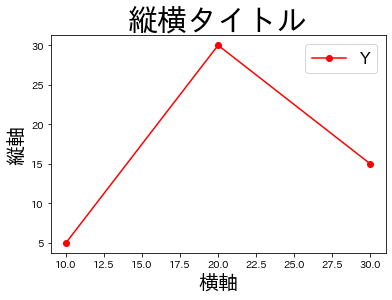

In [34]:
jfont = 'IPAexGothic'    # (1)

fix, ax = plt.subplots()
ax.plot('X', 'Y', 'ro-', data=df2)
ax.set_title('縦横タイトル', size= 30, fontname=jfont)   # (2)
ax.set_xlabel('横軸', size=20, fontname=jfont)          # (3)
ax.set_ylabel('縦軸', size=20, fontname=jfont)          # (4)
ax.legend(prop={'family':jfont, 'size':17})            # (5)
pass

>* (1) 使用するフォントを`jfont`に割り当てる。
>* (2) 引数`fontname`で`jfont`を指定する。タイトルのフォントが変更される。
>* (3) 引数`fontname`で`jfont`を指定する。横軸名のフォントが変更される。
>* (4) 引数`fontname`で`jfont`を指定する。縦軸名のフォントが変更される。
>* (5) `legend`は他と設定方法が異なる。
    * `prop`はフォントのプロパティを設定する引数であり、辞書で指定する。
    * キー`family`に値`jfont`を指定する。凡例のフォントが変更される。
    * キー`size`に数値を設定してフォントの大きさが変更される。

この例では個別にフォントを設定したが、一括で全てのフォントを変更する方法もあるが説明は割愛する。

## マクロ経済学の例

### 投資関数

実質利子率`r`によって投資がどのように変化するかを考えてみよう。まず投資関数を次のように仮定する。

In [35]:
def investment(y):
    return 100/(1+r)**50

* `100`：実質利子率が`0`の場合の投資

実質利子率は次のリストで与えられるとする。

In [36]:
r_list = np.arange(0.01, 0.11, 0.01)
r_list

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [37]:
i_list = []   # 空のリスト

for r in r_list:
    inv = investment(r)   # 投資の計算
    i_list.append(inv)    # リストに追加

df_inv = pd.DataFrame({'investment':i_list,     # DataFrameの作成
                       'interest_rate':r_list})

最初の5行を表示する。

In [38]:
df_inv.head()

,investment,interest_rate
0,60.803882,0.01
1,37.152788,0.02
2,22.810708,0.03
3,14.071262,0.04
4,8.720373,0.05


プロットしてみよう。

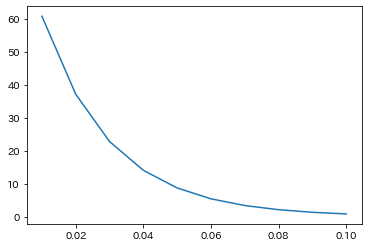

In [39]:
fix, ax = plt.subplots()
ax.plot('interest_rate', 'investment', data=df_inv)
pass

この図に次の「飾り付け」をしてみよう。
* タイトル`投資関数`を追加
* 横軸ラベル`実質利子率`を追加
* 縦軸ラベル`投資`を追加

### 将来価値

`x`万円を実質年率`r`%の利息を得る金融商品に投資し，`t`年間の将来価値（期首の値）をリストで示す関数は以下で与えられた。

In [40]:
def calculate_futre_value(x, r, t):
    
    value_list = [x]           # 初期値が入ったリスト
    
    for year in range(1,t+1):  # 1からtまでの期間
        x = x*(1+r)            # 来期のxの値の計算
        value_list.append(x)   # リストに追加
    
    return value_list          # リストを返す

これを使い，
* `x`=`100`
* `t`=`30`

の下で実質利子率が次のリストで与えられる値を取る場合の将来価値を図示する。

In [41]:
r_list = [0.01, 0.03, 0.06]   # 実質利子率のリスト
dic = {}                      # 空の辞書

for r in r_list:
    dic['r='+str(r)] = calculate_futre_value(100, r, 30)  # 辞書に追加

df_future = pd.DataFrame(dic) # DataFrameの作成

`dic['r='+str(r)]`の説明：
* `str(r)`：`r_list`の要素が割り当てられる`r`は浮動小数点型なので関数`str()`を使って文字列型に変換する。
* `'r='+str(r)`：文字列型の`r=`と文字列型の`str(r)`を`+`で結合する。
* `dic['r='+str(r)]`：辞書`dic`にキー・値のペアを作成する。
    * キー：`'r='+str(r)`（文字列）
    * 値：`calculate_futre_value(100, r, 30)`の返り値

最初の5行を表示する。

In [42]:
df_future.head()

,r=0.01,r=0.03,r=0.06
0,100.000000,100.000000,100.000000
1,101.000000,103.000000,106.000000
2,102.010000,106.090000,112.360000
3,103.030100,109.272700,119.101600
4,104.060401,112.550881,126.247696


最後の5行を表示する。

In [43]:
df_future.tail()

,r=0.01,r=0.03,r=0.06
26,129.525631,215.659127,454.938296
27,130.820888,222.128901,482.234594
28,132.129097,228.792768,511.168670
29,133.450388,235.656551,541.838790
30,134.784892,242.726247,574.349117


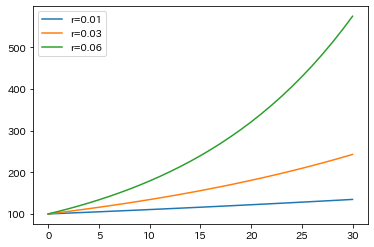

In [44]:
fix, ax = plt.subplots()
ax.plot('r=0.01', data=df_future)
ax.plot('r=0.03', data=df_future)
ax.plot('r=0.06', data=df_future)
ax.legend()
pass

`ax.plot()`が続いているので、`for`ループを使う事を推奨する。

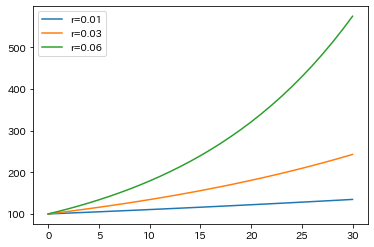

In [45]:
fix, ax = plt.subplots()

for col in df_future.columns:     # (1)
    ax.plot(col, data=df_future)

ax.legend()
pass

（１）の`df_future.columns`について説明すると、`.columns`はデータ・フレーム`df_future`の属性であり列ラベルを返す。

## その他のプロット

### 種類

上で説明した図はライン・プロットと呼ばれる。`Matplotlib`にはその他にも様々なは種類の図を描くことができるが，以下ではライン・プロット以外に[散布図](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)と[ヒストグラム](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)について説明する。引数に関しては，上で説明した[ライン・プロットの引数](sec:4-other_methods)と共通のものが多いので別に覚える必要はないが，それぞれ独自の引数もあるので基本的なものだけを取り上げることにする。

説明には次のコードで生成する`DataFrame`を使う。列`X`と`Y`には標準正規分布（平均`0`，標準偏差`1`）から生成した100個のランダム変数が含まれている。`Z`には正規分布（平均`2`，標準偏差`1`）から抽出した100個のランダム変数が格納されている。

In [46]:
df3 = pd.DataFrame({'X':np.random.normal(size=100),
                    'Y':np.random.normal(size=100),
                    'Z':np.random.normal(loc=2, size=100)})

### 散布図

* 基本的には次の構文となる。
    ```
    fig, ax = plt.subplots()
    ax.scatter(＜横軸のデータ＞, ＜縦軸のデータ＞)
    ```
* `DataFrame`を使う場合は次のように書くことも可能である。
    ```
    fig, ax = plt.subplots()
    ax.scatter(＜横軸の列ラベル＞, ＜縦軸の列ラベル＞, data=＜DataFrame＞)
    ```

`df1`を使って列`X`と`Y`を使ってプロットしてみよう。

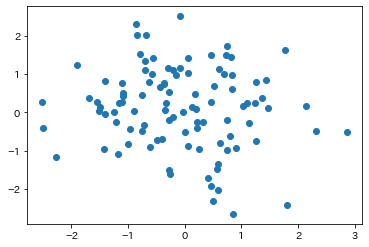

In [47]:
fig, ax = plt.subplots()
ax.scatter('X', 'Y', data=df3)
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができるが，主な引数を紹介する。[詳細はこのサイト](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)を参照。
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`又は`red`：赤
    * `k`又は`black`：黒
    * `g`又は`green`：グリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/3.2.2/api/markers_api.html)）
* `s`：マーカーの大きさ（`markersize`ではない！）
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `label`：凡例の表現を指定
    * `ax.legend()`が設定されている場合のみ有効

実際に引数を指定してみよう。

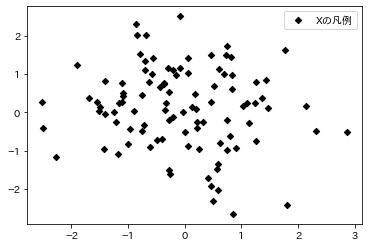

In [48]:
fig, ax = plt.subplots()
ax.scatter('X', 'Y', data=df3,
            color = 'black',
            marker = 'D',
            s = 20,
            label= 'Xの凡例')
ax.legend()
pass

`X`と`Z`の散布図を加えてタイトルなども付け加えてみよう。

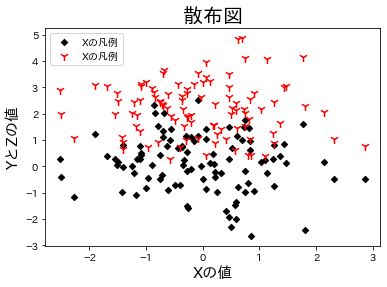

In [49]:
fig, ax = plt.subplots()
ax.scatter('X', 'Y', data=df3,
            color = 'black',
            marker = 'D',
            s = 20,
            label= 'Xの凡例')
ax.scatter('X', 'Z', data=df3,
            color = 'red',
            marker = '1',
            s = 80,
            label= 'Xの凡例')
ax.legend()
ax.set_title('散布図', size=20)
ax.set_xlabel('Xの値', size=15)
ax.set_ylabel('YとZの値', size=15)
pass

### ヒストグラム

* 基本的には次の構文となる。
    ```
    fig, ax = plt.subplots()
    ax.hist(＜データ＞)
    ```
* `DataFrame`を使う場合のように書くことも可能である。
    ```
    fig, ax = plt.subplots()
    ax.scatter(＜列ラベル＞, data=＜DataFrame＞)
    ```
    
`df3`の列`X`を使ってプロットしてみよう。

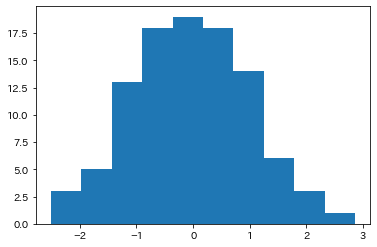

In [50]:
fig, ax = plt.subplots()
ax.hist('X', data=df3)
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `bins`：柱の数
* `linewidth`又は`lw`：柱の間隔（デフォルトは`1`）
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`又は`red`：赤
    * `k`又は`black`：黒
    * `g`又は`green`：グリーン
* `edgecolor`又は`ec`：柱の境界線の色
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）
* `density`：縦軸を相対度数にする（デフォルトは`False`）
    * 全ての柱の**面積**の合計が`1`になるように縦軸が調整される。１つの柱の高さが`1`よりも大きくなる場合もある。
* `label`：凡例の表現を指定
    * `ax.legend()`が設定されている場合のみ有効
    
上のヒストグラムに引数をしてしてみよう。

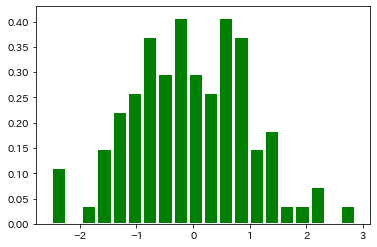

In [51]:
fig, ax = plt.subplots()
ax.hist(df3['X'],
        color='green',
        bins = 20,
        ec='white',
        lw=3,
        density=True)
pass

次に複数のデータを並べてプロットする場合を考えよう。方法は簡単で，異なるデータをリストとして指定すれば良い。

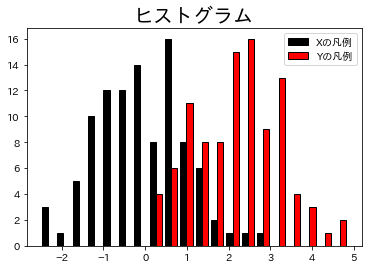

In [52]:
fig, ax = plt.subplots()
ax.hist([df3['X'],df3['Z']],
        bins = 20,
        color = ['black','red'],
        ec='black',
        label=['Xの凡例','Yの凡例'])
ax.legend()
ax.set_title('ヒストグラム', size=20)
pass

上のコードに引数`stacked=True`を加えると，柱を重ねて表示される。試してみよう。また`ax.hist()`を２回使うと，２つのヒストグラムを重ねて表示することができる。この場合，引数`alpha`の値を調整すると良いだろう。

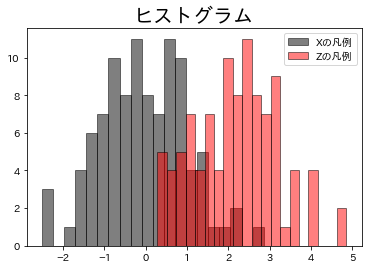

In [53]:
fig, ax = plt.subplots()
ax.hist(df3['X'],
        bins = 20,
        color = 'black',
        ec='black',
        alpha=0.5,
        label='Xの凡例')
ax.hist(df3['Z'],
        bins = 20,
        color = 'red',
        ec='black',
        alpha=0.5,
        label='Zの凡例')
ax.legend()
ax.set_title('ヒストグラム', size=20)
pass

濃い赤の部分が重なっている部分となる。

ヒストグラムは縦軸に度数，横軸に階級を取ったグラフだが，関連する手法にカーネル密度推定と呼ばれるものがある。考え方は簡単で，上のようなヒストグラムのデータに基づき面積が１になるようにスムーズな分布を推定する手法である。残念ながら`Matplotlib`にはカーネル密度推定プロットのメソッドは実装されていない。しかし`DataFrame`のメソッド`plot()`を使えば簡単に描くことが可能である。興味がある読者は[このセクション](sec:5-kernel)を参考にしてはどうだろう。


### 縦線・横線

図に縦線や横線を追加したい場合がある。その場合は，他の図と同じように「軸」に追加していく事になる。次のような書き方となる。

* 縦線の場合
    ```
    ax.axvline(＜横軸の値＞)
    ```
    ここで`axvline`の`ax`はAXis，`v`はVertical，`line`はLINEのことを表している。
* 横線の場合
    ```
    ax.axhline(＜縦軸の値＞)
    ```
    ここで`axhline`の`ax`はAXis，`h`はHorizontal，`line`はLINEのことを表している。

ここで`ax`は`.subplots()`で返された「軸」のことである。

ヒストグラムを使ってプロットしてみよう。

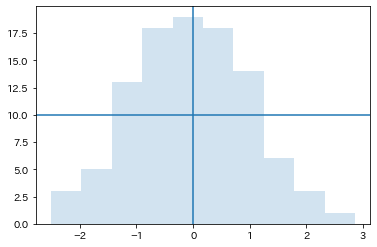

In [54]:
fig, ax = plt.subplots()
ax.hist(df3['X'], alpha=0.2)
ax.axhline(10)
ax.axvline(0)
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)と[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `ymin`：`axvline`の縦軸における最小値（`0`~`1`の値; デフォルト`0`）
* `ymax`：`axvline`の縦軸における最大値（`0`~`1`の値; デフォルト`1`）
* `xmin`：`axhline`の横軸における最小値（`0`~`1`の値; デフォルト`0`）
* `xmax`：`axhline`の横軸における最大値（`0`~`1`の値; デフォルト`1`）
* `linestyle`：線のスタイル（リストにして列の順番で指定する;`-``--``-.``:`）
* `linewidth` or `lw`：線の幅
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）

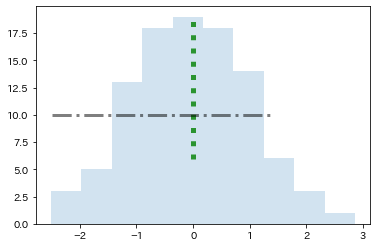

In [55]:
fig, ax = plt.subplots()
ax.hist(df3['X'], alpha=0.2)
ax.axvline(0,
           ymin=0.3,
           ymax=0.95,
           linestyle=':',
           linewidth=5,
           color='g',
           alpha=0.8)
ax.axhline(10,
           xmin=0.05,
           xmax=0.7,
           linestyle='-.',
           linewidth=3,
           color='k',
           alpha=0.5)
pass

### 棒グラフ

まず次のコードでデータを準備しよう。

In [56]:
df4 = pd.DataFrame({'country':['A','B','C'],
                    'gdp':[100,90,110],
                    'con':[50,60,55],
                    'inv':[15,10,20],
                    'gov':[10,5,30],
                    'netex':[25,15,5]})
df4

,country,gdp,con,inv,gov,netex
0,A,100,50,15,10,25
1,B,90,60,10,5,15
2,C,110,55,20,30,5


３国のGDPとその構成要素からなる`DataFrame`である。
* `country`：国
* `gdp`：GDP
* `con`：消費
* `inv`：投資
* `gov`：政府支出
* `netex`：純輸出

この`DataFrame`を使って棒グラフの作成方法を説明するが，次の構文となる。
    ```
    fig, ax = plt.subplots()
    ax.scatter(＜横軸の列ラベル＞, ＜縦軸の列ラベル＞, data=＜DataFrame＞)
    ```

まずA国の`gdp`の棒グラフを表示してみよう。

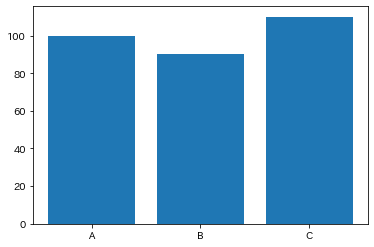

In [57]:
fig, ax = plt.subplots()
ax.bar('country','gdp', data=df4)
pass

**＜基本的な引数＞**

詳しい引数についての説明は[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `width`：棒の幅（デフォルトは`0.8`）
* `bottom`：縦軸での棒の基点（デフォルトは`0`）
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`又は`red`：赤
    * `k`又は`black`：黒
    * `g`又は`green`：グリーン
* `edgecolor`又は`ec`：柱の境界線の色
* `linewidth`又は`lw`：柱の境界線の幅
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）
* `label`：凡例の表現を指定
    * `ax.legend()`と一緒に使う。

これらの引数を使いプロットしてみよう。

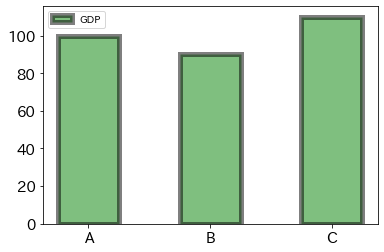

In [58]:
fig, ax = plt.subplots()
ax.bar('country','gdp', data=df4,
       width=0.5,
       color='green',
       ec='black',
       linewidth=5,
       alpha=0.5,
       label='GDP')
ax.legend()
ax.tick_params(axis='both', labelsize=15)
pass

`ax.tick_params()`は縦軸と横軸の文字の大きさを調節している。

次に複数の列データを表示する場合を考えてみよう。まず単に軸にデータを追加する場合を考えてみる。

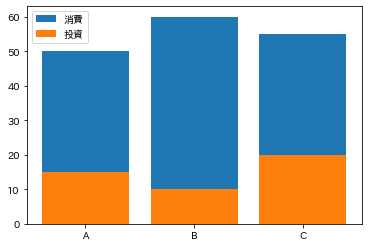

In [59]:
fig, ax = plt.subplots()
ax.bar('country','con', data=df4, label='消費')
ax.bar('country','inv', data=df4, label='投資')
ax.legend()
pass

縦軸を確認するとわかるが，まず消費（`con`）の棒がプロットされ，それに投資（`ivn`）の棒が重ねてプロットされている。これは引数`base`（縦軸における棒の基点）がデフォルトの`0`に設定されており，消費も投資も`0`から始まっているためである。この点を踏まえ，棒を積み上げる場合を考えよう。その場合，投資の`base`は消費の高さになる必要がある。また政府支出を積み上げる場合は，積み上がった消費の高さが政府支出の基点になる必要がある。純輸出を積み上げる場合も同様に考える必要がある。この点に注意して棒を積み上げるには次のようなコードとなる。

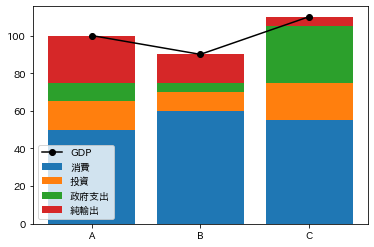

In [60]:
base = df4.iloc[:,2:].cumsum(axis='columns') # (1)
base = base - df4.iloc[:,2:]                 # (2)

var_list = df4.columns[2:]                   # (3)
leg_list = ['消費','投資','政府支出','純輸出']    # (4)

fig, ax = plt.subplots()

for v, l in zip(var_list, leg_list):
    ax.bar('country', v, data=df4,
           label=l,
           bottom=base.loc[:,v])            # (5)

ax.plot('gdp', data=df4,                    # (6)
        color='black', 
        marker='o',
        label='GDP')
ax.legend()
pass

(1)〜(2)で棒の基点となる値を`DataFrame`として計算し，それを(5)で使っている。(3)〜(4)行目は`for`ループに使うイタラブルを作成している。また(6)では列`gdp`のライン・プロットを追加している。コードを見るとわかるように，少々複雑である。よりシンプルなコードで同じ図を描きたい場合は，[ここで](sec:5-bar)説明している`DataFrame`のメソッド`plot()`を参考にすると良いだろう。その方法では(1)〜(2)を自動計算するため引数`base`の値を考える必要がない。

次に，複数の棒（データ）を横に並べたい場合を考えてみよう。主に次の２つの点でコードが少々複雑になってしまう。
* 引数`width`を使い，棒の横の位置を調整する必要がある。
* 国名`A`，`B`，`C`の位置を調整する必要がある。

この２点を考慮すると次のコードとなる。

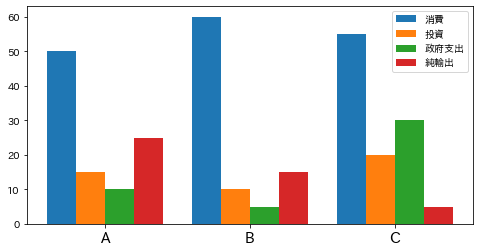

In [61]:
idx = df4.index                 # (1)
wd = 1/5                        # (2)
x_ticks = df4.loc[:,'country']  # (3)

fig, ax = plt.subplots(figsize=(8,4))

for i, (v, l) in enumerate(zip(var_list, leg_list)):
    ax.bar(idx+wd*(i+1),        # (4)
           v,
           data=df4,
           label=l,
           width=wd)            # (5)
    
ax.legend()
ax.set_xticks(idx+wd*2.5,       # (6)
              x_ticks,          # (7)
              fontsize=15)      # (8)
pass

簡単にコードを説明する。
* (1) `df4`の行インデック（番号）を`idx`に割り当てる。これを図の横軸に使う。そのままでは国名が表示されないので，(7)で設定することになる。
* (2) 棒の幅を`1/5`として`wd`に割り当てる。
* (3) 国名を`x_ticks`に割り当てる。(7)で使うことになる。
* (4) 棒の横軸の位置を指定する。ループが実行されるごとに表示される棒は`wd`だけ右にシフトすることになる。
* (5) 棒の幅を`wd`にする。
* (6) 横軸の目盛の位置を指定する。
* (7) 横軸の目盛ラベルを国名`x_ticks`とする。
* (8) 目盛ラベルのフォントの大きさを指定する。

よりシンプルなコードで同じ図を書きたい場合は，[ここで](sec:5-bar)説明している`DataFrame`のメソッド`plot()`を使う方法を利用しても良いだろう。